# 多层神经网络
![](picture/神经网络.png)
![](picture/神经网络2.png)
![](picture/神经网络3.png)

## 利用正向传播激活神经网络
![](picture/正向传播算法.png)
![](picture/正向传播算法2.png)
![](picture/正向传播算法3.png)

## 用正向传播算法进行手写数字识别


In [2]:
import os
import numpy as np
import struct


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))  #解压出字符串格式的数值，返回元组
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)  #从二进制文件中读取数据生成数组

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",  #这是大端字节序，它定义一串字节存储的顺序。lbpath.read(8)读取到的是二进制的字符串
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2  #标准化

    return images, labels

In [14]:
X_train, y_train = load_mnist('data/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [21]:
X_test, y_test = load_mnist('data/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


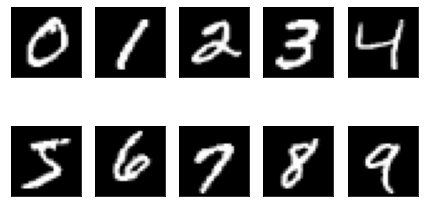

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap="gray")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

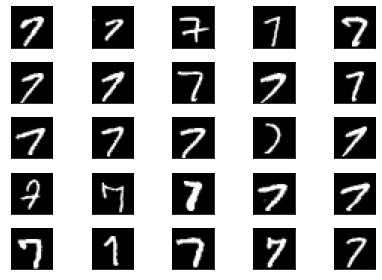

In [19]:
#看看不同的手写数字7
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap="gray")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [24]:
#将数据储存到数组格式
np.savez_compressed("data/mnist_scaled.npz",
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [25]:
#将np数据导入
mnist = np.load("data/mnist_scaled.npz")
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [28]:
X_train, y_train, X_test, y_test = [mnist[s] for s in mnist.files]

### 实现多层感知器

In [29]:
from neuralnet import NeuralNetMLP

In [30]:
nn = NeuralNetMLP(n_hidden=100,#隐藏层单元数
                  l2=0.01,#l2惩罚项
                  epochs=200,#训练集迭代次数
                  eta=0.005,#学习率
                  minibatch_size=100,#随机梯度下降每次训练的样本数量
                  shuffle=True,#打乱数据的排序
                  seed=1)#随机数种子

In [31]:
nn.fit(X_train[:55000],
       y_train[:55000],
       X_train[55000:],#验证集数据
       y_train[55000:])

200/200 | Cost: 7402.89 | Train/Valid Acc.: 98.60%/97.56%  

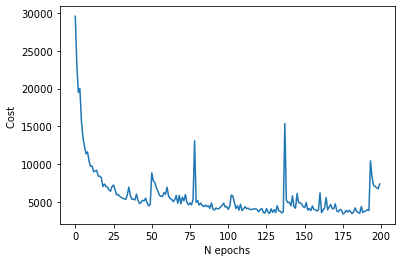

In [32]:
plt.plot(range(nn.epochs),nn.eval_['cost'])
plt.xlabel('N epochs')
plt.ylabel('Cost ')
plt.show()

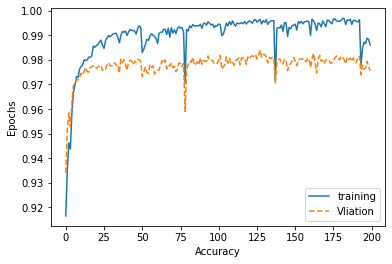

In [35]:
#准确率的图
plt.plot(range(nn.epochs),nn.eval_['train_acc'],label="training")
plt.plot(range(nn.epochs),nn.eval_['valid_acc'],label="Vliation",linestyle="--")
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [36]:
#计算准确率
y_test_pre=nn.predict(X_test)
acc=(np.sum(y_test==y_test_pre ).astype(float)/X_test.shape[0])
print(acc)

0.9705


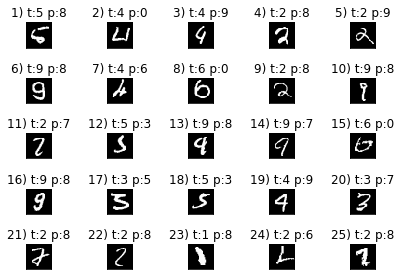

In [38]:
#看一下预测错误的图片
misci_img=X_test[y_test!=y_test_pre][:25]
correct_lab=y_test[y_test_pre!=y_test][:25]
misci_lab=y_test_pre[y_test!=y_test_pre][:25]
fig ,ax=plt.subplots(nrows=5,ncols=5,sharey=True,sharex=True)
ax=ax.flatten()
for i in range(25):
    img=misci_img[i].reshape(28,28)
    ax[i].imshow(img,
                 cmap="gray",
                 interpolation="nearest")
    ax[i].set_title('%d) t:%d p:%d'%(i+1,correct_lab[i],misci_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 训练人工神经网络
![](picture/逻辑函数的计算.png)
![](picture/逻辑函数的计算2.png)
![](picture/逻辑函数的计算3.png)
![](picture/反向传播算法.png)
![](picture/反向传播算法2.png)
![](picture/正向传播算法3.png)
![](picture/反向传播算法4.png)
![](picture/反向传播算法5.png)
![](picture/反向传播算法6.png)
![](picture/反向传播算法7.png)
![](picture/反向传播算法8.png)

### 我们揭开了常见的反向传播算法的神秘外衣，该算法是构建深度学习的众多神经网络模型的基础。在学习了反向传播算法之后，本章已经为探索更复杂的深度神经网络体系结构做好了准备。本书剩下的几个章节将介绍面向深度学习的开源系统TensorFlow，以便更有效地实现和训练多层神经网络。